In [ ]:
from src.trainer import train
import random
import numpy as np
import gymnasium as gym
import config

In [ ]:
trained_agent = train()

Ep 10 reward 10.0 MA(100) 37.70 eps 0.990
Ep 20 reward -1.0 MA(100) 35.85 eps 0.980
Ep 30 reward -11.0 MA(100) 21.30 eps 0.970
Ep 40 reward -6.0 MA(100) 14.18 eps 0.961
Ep 50 reward -3.0 MA(100) 10.56 eps 0.951
Ep 60 reward -2.0 MA(100) 8.22 eps 0.942
Ep 70 reward -2.0 MA(100) 6.11 eps 0.932
Ep 80 reward -8.0 MA(100) 4.80 eps 0.923
Ep 90 reward -7.0 MA(100) 3.22 eps 0.914
Ep 100 reward -3.0 MA(100) 1.97 eps 0.905
q_table stats: min -2.704, mean 0.023, max 1.560
Ep 110 reward -4.0 MA(100) -2.12 eps 0.896
Ep 120 reward 79.0 MA(100) -3.07 eps 0.887
Ep 130 reward 101.0 MA(100) 7.23 eps 0.878
Ep 140 reward 105.0 MA(100) 18.34 eps 0.869
Ep 150 reward 87.0 MA(100) 28.69 eps 0.861
Ep 160 reward 99.0 MA(100) 38.64 eps 0.852
Ep 170 reward 86.0 MA(100) 48.51 eps 0.844
Ep 180 reward 95.0 MA(100) 58.07 eps 0.835
Ep 190 reward 86.0 MA(100) 67.97 eps 0.827
Ep 200 reward 86.0 MA(100) 77.28 eps 0.819
q_table stats: min -1.550, mean 2.414, max 9.808
Ep 210 reward 91.0 MA(100) 86.52 eps 0.810
Ep 220 rewa

c:\Users\Andrija Lukic\AppData\Local\Programs\Python\Python310\lib\site-packages\pygame\pkgdata.py:27: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


Ep 510 reward 111.0 MA(100) 116.53 eps 0.600
Ep 520 reward 132.0 MA(100) 117.14 eps 0.594
Ep 530 reward 131.0 MA(100) 118.25 eps 0.588
Ep 540 reward 94.0 MA(100) 114.44 eps 0.583
Ep 550 reward 108.0 MA(100) 115.59 eps 0.577
Ep 560 reward 152.0 MA(100) 117.12 eps 0.571
Ep 570 reward 114.0 MA(100) 116.76 eps 0.565
Ep 580 reward 95.0 MA(100) 117.28 eps 0.560
Ep 590 reward 102.0 MA(100) 115.76 eps 0.554
Ep 600 reward 100.0 MA(100) 116.64 eps 0.549
q_table stats: min -0.158, mean 16.831, max 60.747
Ep 610 reward 111.0 MA(100) 116.83 eps 0.543
Ep 620 reward 123.0 MA(100) 117.29 eps 0.538
Ep 630 reward 112.0 MA(100) 125.47 eps 0.532
Ep 640 reward 107.0 MA(100) 128.56 eps 0.527
Ep 650 reward 104.0 MA(100) 128.81 eps 0.522
Ep 660 reward 120.0 MA(100) 128.92 eps 0.517
Ep 670 reward 109.0 MA(100) 130.72 eps 0.512
Ep 680 reward 113.0 MA(100) 131.93 eps 0.506
Ep 690 reward 137.0 MA(100) 135.42 eps 0.501
Ep 700 reward 128.0 MA(100) 136.01 eps 0.496
q_table stats: min -0.150, mean 20.888, max 74.538


In [12]:
def test(fql_agent, num_episodes=100, render=False, seed=None, max_steps=None, verbose=True):
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    env = gym.make(config.ENV_NAME, render_mode="human")
    max_steps = max_steps or getattr(config, "MAX_STEPS_PER_EPISODE", 1000)

    prev_eps = getattr(fql_agent, "epsilon", None)
    if prev_eps is not None:
        fql_agent.epsilon = 0.0

    episode_rewards = []
    try:
        for ep in range(1, num_episodes + 1):
            if seed is not None:
                obs, _ = env.reset(seed=seed + ep)
            else:
                obs, _ = env.reset()

            total_reward = 0.0
            terminated = truncated = False
            steps = 0
            cart_pos, cart_vel, pole_angle, pole_ang_vel = obs
            action = fql_agent.get_initial_action([float(pole_angle), float(pole_ang_vel)])

            while not (terminated or truncated) and steps < max_steps:
                obs, reward, terminated, truncated, _ = env.step(int(action))
                total_reward += reward
                steps += 1

                if terminated or truncated:
                    break

                _, _, pole_angle, pole_ang_vel = obs
                action = fql_agent.get_action([float(pole_angle), float(pole_ang_vel)])

            episode_rewards.append(total_reward)

            if verbose and (ep == 1 or ep % 10 == 0 or ep == num_episodes):
                recent_ma = float(np.mean(episode_rewards[-100:]))
                print(f"[Test] Ep {ep}/{num_episodes} reward {total_reward:.1f} recent_MA({min(100,len(episode_rewards))}) {recent_ma:.2f}")

    finally:
        if prev_eps is not None:
            fql_agent.epsilon = prev_eps
        env.close()

    stats = {
        "mean": float(np.mean(episode_rewards)),
        "std": float(np.std(episode_rewards)),
        "min": float(np.min(episode_rewards)),
        "max": float(np.max(episode_rewards)),
        "median": float(np.median(episode_rewards)),
    }

    if verbose:
        print("=== Evaluation summary ===")
        print(f"episodes: {len(episode_rewards)}  mean: {stats['mean']:.2f}  std: {stats['std']:.2f}  min: {stats['min']:.1f}  max: {stats['max']:.1f}")

    return episode_rewards, stats

In [13]:
test_rewards, test_stats = test(trained_agent[0], num_episodes=50, render=True, seed=42)

NameError: name 'trained_agent' is not defined

In [11]:
np.save(f"q_table_best_ep{5700}.npy", trained_agent[0].q_table)

In [8]:
import re
import matplotlib.pyplot as plt

log_text = """Ep 10 reward 10.0 MA(100) 37.70 eps 0.990
Ep 20 reward -1.0 MA(100) 35.85 eps 0.980
Ep 30 reward -11.0 MA(100) 21.30 eps 0.970
Ep 40 reward -6.0 MA(100) 14.18 eps 0.961
Ep 50 reward -3.0 MA(100) 10.56 eps 0.951
Ep 60 reward -2.0 MA(100) 8.22 eps 0.942
Ep 70 reward -2.0 MA(100) 6.11 eps 0.932
Ep 80 reward -8.0 MA(100) 4.80 eps 0.923
Ep 90 reward -7.0 MA(100) 3.22 eps 0.914
Ep 100 reward -3.0 MA(100) 1.97 eps 0.905
q_table stats: min -2.704, mean 0.023, max 1.560
Ep 110 reward -4.0 MA(100) -2.12 eps 0.896
Ep 120 reward 79.0 MA(100) -3.07 eps 0.887
Ep 130 reward 101.0 MA(100) 7.23 eps 0.878
Ep 140 reward 105.0 MA(100) 18.34 eps 0.869
Ep 150 reward 87.0 MA(100) 28.69 eps 0.861
Ep 160 reward 99.0 MA(100) 38.64 eps 0.852
Ep 170 reward 86.0 MA(100) 48.51 eps 0.844
Ep 180 reward 95.0 MA(100) 58.07 eps 0.835
Ep 190 reward 86.0 MA(100) 67.97 eps 0.827
Ep 200 reward 86.0 MA(100) 77.28 eps 0.819
q_table stats: min -1.550, mean 2.414, max 9.808
Ep 210 reward 91.0 MA(100) 86.52 eps 0.810
Ep 220 reward 97.0 MA(100) 93.23 eps 0.802
Ep 230 reward 95.0 MA(100) 93.05 eps 0.794
Ep 240 reward 99.0 MA(100) 92.12 eps 0.787
Ep 250 reward 122.0 MA(100) 92.75 eps 0.779
Ep 260 reward 144.0 MA(100) 95.20 eps 0.771
Ep 270 reward 98.0 MA(100) 97.08 eps 0.763
Ep 280 reward 93.0 MA(100) 98.13 eps 0.756
Ep 290 reward 101.0 MA(100) 99.91 eps 0.748
Ep 300 reward 92.0 MA(100) 101.79 eps 0.741
q_table stats: min -0.160, mean 5.875, max 22.192
Ep 310 reward 103.0 MA(100) 102.66 eps 0.733
Ep 320 reward 93.0 MA(100) 103.36 eps 0.726
Ep 330 reward 96.0 MA(100) 103.76 eps 0.719
Ep 340 reward 148.0 MA(100) 105.02 eps 0.712
Ep 350 reward 180.0 MA(100) 109.58 eps 0.705
Ep 360 reward 125.0 MA(100) 112.81 eps 0.698
Ep 370 reward 149.0 MA(100) 116.17 eps 0.691
Ep 380 reward 106.0 MA(100) 118.71 eps 0.684
Ep 390 reward 104.0 MA(100) 119.35 eps 0.677
Ep 400 reward 97.0 MA(100) 119.51 eps 0.670
q_table stats: min -0.160, mean 9.734, max 37.725
Ep 410 reward 150.0 MA(100) 125.15 eps 0.664
Ep 420 reward 115.0 MA(100) 126.44 eps 0.657
Ep 430 reward 110.0 MA(100) 127.63 eps 0.650
Ep 440 reward 305.0 MA(100) 131.30 eps 0.644
Ep 450 reward 111.0 MA(100) 127.88 eps 0.637
Ep 460 reward 141.0 MA(100) 124.67 eps 0.631
Ep 470 reward 94.0 MA(100) 121.36 eps 0.625
Ep 480 reward 142.0 MA(100) 119.04 eps 0.619
Ep 490 reward 95.0 MA(100) 119.31 eps 0.612
Ep 500 reward 96.0 MA(100) 119.89 eps 0.606
q_table stats: min -0.159, mean 13.362, max 50.029
Ep 510 reward 111.0 MA(100) 116.53 eps 0.600
Ep 520 reward 132.0 MA(100) 117.14 eps 0.594
Ep 530 reward 131.0 MA(100) 118.25 eps 0.588
Ep 540 reward 94.0 MA(100) 114.44 eps 0.583
Ep 550 reward 108.0 MA(100) 115.59 eps 0.577
Ep 560 reward 152.0 MA(100) 117.12 eps 0.571
Ep 570 reward 114.0 MA(100) 116.76 eps 0.565
Ep 580 reward 95.0 MA(100) 117.28 eps 0.560
Ep 590 reward 102.0 MA(100) 115.76 eps 0.554
Ep 600 reward 100.0 MA(100) 116.64 eps 0.549
q_table stats: min -0.158, mean 16.831, max 60.747
Ep 610 reward 111.0 MA(100) 116.83 eps 0.543
Ep 620 reward 123.0 MA(100) 117.29 eps 0.538
Ep 630 reward 112.0 MA(100) 125.47 eps 0.532
Ep 640 reward 107.0 MA(100) 128.56 eps 0.527
Ep 650 reward 104.0 MA(100) 128.81 eps 0.522
Ep 660 reward 120.0 MA(100) 128.92 eps 0.517
Ep 670 reward 109.0 MA(100) 130.72 eps 0.512
Ep 680 reward 113.0 MA(100) 131.93 eps 0.506
Ep 690 reward 137.0 MA(100) 135.42 eps 0.501
Ep 700 reward 128.0 MA(100) 136.01 eps 0.496
q_table stats: min -0.150, mean 20.888, max 74.538
Ep 710 reward 269.0 MA(100) 144.84 eps 0.491
Ep 720 reward 127.0 MA(100) 151.59 eps 0.487
Ep 730 reward 307.0 MA(100) 159.47 eps 0.482
Ep 740 reward 122.0 MA(100) 164.14 eps 0.477
Ep 750 reward 234.0 MA(100) 178.12 eps 0.472
Ep 760 reward 178.0 MA(100) 183.86 eps 0.467
Ep 770 reward 132.0 MA(100) 187.82 eps 0.463
Ep 780 reward 109.0 MA(100) 188.20 eps 0.458
Ep 790 reward 110.0 MA(100) 188.95 eps 0.454
Ep 800 reward 100.0 MA(100) 189.45 eps 0.449
q_table stats: min 0.634, mean 24.659, max 84.843
Ep 810 reward 117.0 MA(100) 186.02 eps 0.445
Ep 820 reward 123.0 MA(100) 182.57 eps 0.440
Ep 830 reward 121.0 MA(100) 169.53 eps 0.436
Ep 840 reward 217.0 MA(100) 167.64 eps 0.432
Ep 850 reward 165.0 MA(100) 155.84 eps 0.427
Ep 860 reward 101.0 MA(100) 147.25 eps 0.423
Ep 870 reward 154.0 MA(100) 144.44 eps 0.419
Ep 880 reward 205.0 MA(100) 153.10 eps 0.415
Ep 890 reward 121.0 MA(100) 152.51 eps 0.410
Ep 900 reward 115.0 MA(100) 150.54 eps 0.406
q_table stats: min 1.342, mean 27.818, max 93.827
Ep 910 reward 133.0 MA(100) 148.56 eps 0.402
Ep 920 reward 156.0 MA(100) 151.11 eps 0.398
Ep 930 reward 116.0 MA(100) 150.72 eps 0.394
Ep 940 reward 109.0 MA(100) 146.97 eps 0.390
Ep 950 reward 145.0 MA(100) 147.02 eps 0.387
Ep 960 reward 157.0 MA(100) 165.49 eps 0.383
Ep 970 reward 120.0 MA(100) 164.60 eps 0.379
Ep 980 reward 161.0 MA(100) 159.39 eps 0.375
Ep 990 reward 172.0 MA(100) 164.75 eps 0.371
Ep 1000 reward 185.0 MA(100) 175.02 eps 0.368
q_table stats: min 1.803, mean 31.283, max 102.352
Ep 1010 reward 139.0 MA(100) 177.65 eps 0.364
Ep 1020 reward 202.0 MA(100) 181.57 eps 0.360
Ep 1030 reward 233.0 MA(100) 184.38 eps 0.357
Ep 1040 reward 154.0 MA(100) 190.43 eps 0.353
Ep 1050 reward 150.0 MA(100) 195.34 eps 0.350
Ep 1060 reward 136.0 MA(100) 181.54 eps 0.346
Ep 1070 reward 239.0 MA(100) 185.51 eps 0.343
Ep 1080 reward 234.0 MA(100) 187.58 eps 0.339
Ep 1090 reward 143.0 MA(100) 182.89 eps 0.336
Ep 1100 reward 121.0 MA(100) 182.48 eps 0.333
q_table stats: min 1.873, mean 34.299, max 109.711
Ep 1110 reward 138.0 MA(100) 181.33 eps 0.329
Ep 1120 reward 204.0 MA(100) 177.77 eps 0.326
Ep 1130 reward 185.0 MA(100) 183.21 eps 0.323
Ep 1140 reward 161.0 MA(100) 184.34 eps 0.320
Ep 1150 reward 135.0 MA(100) 187.43 eps 0.316
Ep 1160 reward 257.0 MA(100) 189.48 eps 0.313
Ep 1170 reward 169.0 MA(100) 190.16 eps 0.310
Ep 1180 reward 195.0 MA(100) 193.12 eps 0.307
Ep 1190 reward 225.0 MA(100) 198.48 eps 0.304
Ep 1200 reward 161.0 MA(100) 196.73 eps 0.301
q_table stats: min 2.294, mean 37.436, max 117.858
Ep 1210 reward 182.0 MA(100) 199.20 eps 0.298
Ep 1220 reward 269.0 MA(100) 203.50 eps 0.295
Ep 1230 reward 122.0 MA(100) 201.67 eps 0.292
Ep 1240 reward 232.0 MA(100) 204.68 eps 0.289
Ep 1250 reward 338.0 MA(100) 203.63 eps 0.286
Ep 1260 reward 167.0 MA(100) 205.32 eps 0.283
Ep 1270 reward 146.0 MA(100) 208.26 eps 0.281
Ep 1280 reward 120.0 MA(100) 205.75 eps 0.278
Ep 1290 reward 228.0 MA(100) 207.79 eps 0.275
Ep 1300 reward 248.0 MA(100) 207.37 eps 0.272
q_table stats: min 2.806, mean 40.399, max 125.218
Ep 1310 reward 113.0 MA(100) 203.24 eps 0.270
Ep 1320 reward 173.0 MA(100) 195.23 eps 0.267
Ep 1330 reward 378.0 MA(100) 197.17 eps 0.264
Ep 1340 reward 127.0 MA(100) 191.03 eps 0.262
Ep 1350 reward 210.0 MA(100) 186.78 eps 0.259
Ep 1360 reward 159.0 MA(100) 181.52 eps 0.256
Ep 1370 reward 131.0 MA(100) 176.39 eps 0.254
Ep 1380 reward 169.0 MA(100) 175.80 eps 0.251
Ep 1390 reward 253.0 MA(100) 174.86 eps 0.249
Ep 1400 reward 119.0 MA(100) 172.41 eps 0.246
q_table stats: min 3.059, mean 42.073, max 126.884
Ep 1410 reward 157.0 MA(100) 176.88 eps 0.244
Ep 1420 reward 147.0 MA(100) 178.70 eps 0.242
Ep 1430 reward 227.0 MA(100) 171.16 eps 0.239
Ep 1440 reward 150.0 MA(100) 173.89 eps 0.237
Ep 1450 reward 151.0 MA(100) 177.19 eps 0.234
Ep 1460 reward 161.0 MA(100) 183.33 eps 0.232
Ep 1470 reward 158.0 MA(100) 187.09 eps 0.230
Ep 1480 reward 271.0 MA(100) 187.59 eps 0.227
Ep 1490 reward 232.0 MA(100) 186.36 eps 0.225
Ep 1500 reward 136.0 MA(100) 187.38 eps 0.223
q_table stats: min 3.183, mean 43.714, max 129.602
Ep 1510 reward 127.0 MA(100) 185.37 eps 0.221
Ep 1520 reward 243.0 MA(100) 189.20 eps 0.219
Ep 1530 reward 216.0 MA(100) 195.86 eps 0.216
Ep 1540 reward 161.0 MA(100) 194.45 eps 0.214
Ep 1550 reward 237.0 MA(100) 193.42 eps 0.212
Ep 1560 reward 232.0 MA(100) 192.23 eps 0.210
Ep 1570 reward 176.0 MA(100) 191.94 eps 0.208
Ep 1580 reward 205.0 MA(100) 192.91 eps 0.206
Ep 1590 reward 189.0 MA(100) 192.84 eps 0.204
Ep 1600 reward 228.0 MA(100) 192.59 eps 0.202
q_table stats: min 3.218, mean 45.026, max 130.802
Ep 1610 reward 171.0 MA(100) 194.33 eps 0.200
Ep 1620 reward 201.0 MA(100) 194.48 eps 0.198
Ep 1630 reward 304.0 MA(100) 191.62 eps 0.196
Ep 1640 reward 312.0 MA(100) 192.56 eps 0.194
Ep 1650 reward 217.0 MA(100) 194.72 eps 0.192
Ep 1660 reward 136.0 MA(100) 196.67 eps 0.190
Ep 1670 reward 129.0 MA(100) 194.90 eps 0.188
Ep 1680 reward 154.0 MA(100) 196.01 eps 0.186
Ep 1690 reward 131.0 MA(100) 195.88 eps 0.184
Ep 1700 reward 272.0 MA(100) 203.06 eps 0.183
q_table stats: min 3.253, mean 46.155, max 131.892
Ep 1710 reward 172.0 MA(100) 201.80 eps 0.181
Ep 1720 reward 191.0 MA(100) 201.11 eps 0.179
Ep 1730 reward 238.0 MA(100) 202.89 eps 0.177
Ep 1740 reward 151.0 MA(100) 199.19 eps 0.175
Ep 1750 reward 117.0 MA(100) 196.82 eps 0.174
Ep 1760 reward 272.0 MA(100) 197.34 eps 0.172
Ep 1770 reward 274.0 MA(100) 199.90 eps 0.170
Ep 1780 reward 155.0 MA(100) 199.23 eps 0.168
Ep 1790 reward 184.0 MA(100) 198.52 eps 0.167
Ep 1800 reward 224.0 MA(100) 196.20 eps 0.165
q_table stats: min 3.288, mean 47.009, max 131.796
Ep 1810 reward 116.0 MA(100) 194.34 eps 0.164
Ep 1820 reward 122.0 MA(100) 194.80 eps 0.162
Ep 1830 reward 222.0 MA(100) 191.34 eps 0.160
Ep 1840 reward 223.0 MA(100) 193.86 eps 0.159
Ep 1850 reward 234.0 MA(100) 191.38 eps 0.157
Ep 1860 reward 202.0 MA(100) 190.34 eps 0.156
Ep 1870 reward 195.0 MA(100) 187.65 eps 0.154
Ep 1880 reward 202.0 MA(100) 189.42 eps 0.152
Ep 1890 reward 196.0 MA(100) 187.73 eps 0.151
Ep 1900 reward 157.0 MA(100) 182.30 eps 0.149
q_table stats: min 3.291, mean 47.474, max 130.972
Ep 1910 reward 134.0 MA(100) 187.18 eps 0.148
Ep 1920 reward 186.0 MA(100) 182.61 eps 0.146
Ep 1930 reward 133.0 MA(100) 183.52 eps 0.145
Ep 1940 reward 127.0 MA(100) 187.78 eps 0.144
Ep 1950 reward 124.0 MA(100) 185.86 eps 0.142
Ep 1960 reward 203.0 MA(100) 184.77 eps 0.141
Ep 1970 reward 220.0 MA(100) 187.13 eps 0.139
Ep 1980 reward 223.0 MA(100) 184.48 eps 0.138
Ep 1990 reward 201.0 MA(100) 185.58 eps 0.137
Ep 2000 reward 145.0 MA(100) 187.11 eps 0.135
q_table stats: min 3.279, mean 47.677, max 129.337
Ep 2010 reward 259.0 MA(100) 186.03 eps 0.134
Ep 2020 reward 265.0 MA(100) 190.14 eps 0.133
Ep 2030 reward 211.0 MA(100) 196.03 eps 0.131
Ep 2040 reward 336.0 MA(100) 194.63 eps 0.130
Ep 2050 reward 198.0 MA(100) 196.11 eps 0.129
Ep 2060 reward 171.0 MA(100) 197.91 eps 0.127
Ep 2070 reward 134.0 MA(100) 196.33 eps 0.126
Ep 2080 reward 153.0 MA(100) 197.64 eps 0.125
Ep 2090 reward 210.0 MA(100) 197.44 eps 0.124
Ep 2100 reward 142.0 MA(100) 196.82 eps 0.122
q_table stats: min 3.271, mean 47.855, max 128.170
Ep 2110 reward 190.0 MA(100) 197.30 eps 0.121
Ep 2120 reward 235.0 MA(100) 197.09 eps 0.120
Ep 2130 reward 251.0 MA(100) 191.02 eps 0.119
Ep 2140 reward 227.0 MA(100) 189.15 eps 0.118
Ep 2150 reward 208.0 MA(100) 192.54 eps 0.116
Ep 2160 reward 233.0 MA(100) 192.49 eps 0.115
Ep 2170 reward 302.0 MA(100) 198.85 eps 0.114
Ep 2180 reward 184.0 MA(100) 196.43 eps 0.113
Ep 2190 reward 145.0 MA(100) 197.35 eps 0.112
Ep 2200 reward 174.0 MA(100) 197.13 eps 0.111
q_table stats: min 3.247, mean 47.844, max 126.274
Ep 2210 reward 211.0 MA(100) 197.66 eps 0.110
Ep 2220 reward 236.0 MA(100) 195.01 eps 0.108
Ep 2230 reward 201.0 MA(100) 194.79 eps 0.107
Ep 2240 reward 217.0 MA(100) 193.45 eps 0.106
Ep 2250 reward 226.0 MA(100) 193.96 eps 0.105
Ep 2260 reward 195.0 MA(100) 191.74 eps 0.104
Ep 2270 reward 195.0 MA(100) 186.51 eps 0.103
Ep 2280 reward 210.0 MA(100) 187.03 eps 0.102
Ep 2290 reward 143.0 MA(100) 184.25 eps 0.101
Ep 2300 reward 153.0 MA(100) 183.57 eps 0.100
q_table stats: min 3.225, mean 47.631, max 123.985
Ep 2310 reward 208.0 MA(100) 181.13 eps 0.099
Ep 2320 reward 145.0 MA(100) 181.16 eps 0.098
Ep 2330 reward 130.0 MA(100) 180.49 eps 0.097
Ep 2340 reward 195.0 MA(100) 181.21 eps 0.096
Ep 2350 reward 188.0 MA(100) 176.78 eps 0.095
Ep 2360 reward 132.0 MA(100) 174.70 eps 0.094
Ep 2370 reward 192.0 MA(100) 173.34 eps 0.093
Ep 2380 reward 221.0 MA(100) 173.05 eps 0.092
Ep 2390 reward 183.0 MA(100) 176.07 eps 0.092
Ep 2400 reward 254.0 MA(100) 179.42 eps 0.091
q_table stats: min 3.208, mean 47.343, max 121.895
Ep 2410 reward 230.0 MA(100) 177.78 eps 0.090
Ep 2420 reward 241.0 MA(100) 178.78 eps 0.089
Ep 2430 reward 194.0 MA(100) 180.45 eps 0.088
Ep 2440 reward 223.0 MA(100) 180.78 eps 0.087
Ep 2450 reward 185.0 MA(100) 182.32 eps 0.086
Ep 2460 reward 153.0 MA(100) 182.40 eps 0.085
Ep 2470 reward 137.0 MA(100) 181.46 eps 0.084
Ep 2480 reward 215.0 MA(100) 182.17 eps 0.084
Ep 2490 reward 157.0 MA(100) 181.24 eps 0.083
Ep 2500 reward 267.0 MA(100) 180.37 eps 0.082
q_table stats: min 3.180, mean 46.995, max 119.874
Ep 2510 reward 160.0 MA(100) 181.49 eps 0.081
Ep 2520 reward 127.0 MA(100) 180.78 eps 0.080
Ep 2530 reward 130.0 MA(100) 179.56 eps 0.080
Ep 2540 reward 178.0 MA(100) 179.64 eps 0.079
Ep 2550 reward 227.0 MA(100) 180.61 eps 0.078
Ep 2560 reward 197.0 MA(100) 182.89 eps 0.077
Ep 2570 reward 246.0 MA(100) 183.38 eps 0.076
Ep 2580 reward 127.0 MA(100) 180.44 eps 0.076
Ep 2590 reward 189.0 MA(100) 181.55 eps 0.075
Ep 2600 reward 213.0 MA(100) 179.56 eps 0.074
q_table stats: min 3.144, mean 46.473, max 117.675
Ep 2610 reward 175.0 MA(100) 179.36 eps 0.073
Ep 2620 reward 148.0 MA(100) 178.42 eps 0.073
Ep 2630 reward 138.0 MA(100) 177.10 eps 0.072
Ep 2640 reward 214.0 MA(100) 176.78 eps 0.071
Ep 2650 reward 168.0 MA(100) 174.27 eps 0.071
Ep 2660 reward 245.0 MA(100) 175.78 eps 0.070
Ep 2670 reward 217.0 MA(100) 177.20 eps 0.069
Ep 2680 reward 206.0 MA(100) 178.65 eps 0.068
Ep 2690 reward 121.0 MA(100) 175.04 eps 0.068
Ep 2700 reward 185.0 MA(100) 175.24 eps 0.067
q_table stats: min 3.110, mean 46.028, max 115.910
Ep 2710 reward 251.0 MA(100) 175.02 eps 0.066
Ep 2720 reward 148.0 MA(100) 174.62 eps 0.066
Ep 2730 reward 260.0 MA(100) 176.74 eps 0.065
Ep 2740 reward 158.0 MA(100) 174.71 eps 0.064
Ep 2750 reward 115.0 MA(100) 175.37 eps 0.064
Ep 2760 reward 177.0 MA(100) 172.77 eps 0.063
Ep 2770 reward 222.0 MA(100) 170.69 eps 0.063
Ep 2780 reward 131.0 MA(100) 168.58 eps 0.062
Ep 2790 reward 121.0 MA(100) 170.50 eps 0.061
Ep 2800 reward 225.0 MA(100) 169.32 eps 0.061
q_table stats: min 3.087, mean 45.566, max 114.604
Ep 2810 reward 230.0 MA(100) 170.52 eps 0.060
Ep 2820 reward 213.0 MA(100) 170.88 eps 0.060
Ep 2830 reward 135.0 MA(100) 170.29 eps 0.059
Ep 2840 reward 242.0 MA(100) 173.15 eps 0.058
Ep 2850 reward 114.0 MA(100) 173.22 eps 0.058
Ep 2860 reward 194.0 MA(100) 175.37 eps 0.057
Ep 2870 reward 125.0 MA(100) 176.23 eps 0.057
Ep 2880 reward 205.0 MA(100) 179.09 eps 0.056
Ep 2890 reward 207.0 MA(100) 178.77 eps 0.055
Ep 2900 reward 133.0 MA(100) 179.54 eps 0.055
q_table stats: min 3.068, mean 45.107, max 113.057
Ep 2910 reward 193.0 MA(100) 182.07 eps 0.054
Ep 2920 reward 135.0 MA(100) 182.82 eps 0.054
Ep 2930 reward 210.0 MA(100) 182.56 eps 0.053
Ep 2940 reward 180.0 MA(100) 181.38 eps 0.053
Ep 2950 reward 196.0 MA(100) 182.89 eps 0.052
Ep 2960 reward 228.0 MA(100) 182.29 eps 0.052
Ep 2970 reward 124.0 MA(100) 183.05 eps 0.051
Ep 2980 reward 178.0 MA(100) 184.51 eps 0.051
Ep 2990 reward 136.0 MA(100) 184.66 eps 0.050
Ep 3000 reward 120.0 MA(100) 187.30 eps 0.050
q_table stats: min 3.047, mean 44.646, max 111.693
Ep 3010 reward 178.0 MA(100) 184.17 eps 0.049
Ep 3020 reward 151.0 MA(100) 183.92 eps 0.049
Ep 3030 reward 224.0 MA(100) 184.32 eps 0.048
Ep 3040 reward 236.0 MA(100) 184.22 eps 0.048
Ep 3050 reward 194.0 MA(100) 183.25 eps 0.047
Ep 3060 reward 206.0 MA(100) 181.98 eps 0.047
Ep 3070 reward 212.0 MA(100) 182.65 eps 0.046
Ep 3080 reward 214.0 MA(100) 181.96 eps 0.046
Ep 3090 reward 117.0 MA(100) 180.83 eps 0.045
Ep 3100 reward 136.0 MA(100) 181.07 eps 0.045
q_table stats: min 3.026, mean 44.142, max 110.224
Ep 3110 reward 210.0 MA(100) 182.61 eps 0.045
Ep 3120 reward 148.0 MA(100) 183.22 eps 0.044
Ep 3130 reward 212.0 MA(100) 183.62 eps 0.044
Ep 3140 reward 133.0 MA(100) 182.74 eps 0.043
Ep 3150 reward 135.0 MA(100) 183.07 eps 0.043
Ep 3160 reward 158.0 MA(100) 183.49 eps 0.042
Ep 3170 reward 234.0 MA(100) 182.56 eps 0.042
Ep 3180 reward 226.0 MA(100) 181.81 eps 0.042
Ep 3190 reward 133.0 MA(100) 182.60 eps 0.041
Ep 3200 reward 221.0 MA(100) 181.79 eps 0.041
q_table stats: min 3.015, mean 43.771, max 108.799
Ep 3210 reward 128.0 MA(100) 178.97 eps 0.040
Ep 3220 reward 135.0 MA(100) 178.81 eps 0.040
Ep 3230 reward 236.0 MA(100) 178.85 eps 0.039
Ep 3240 reward 183.0 MA(100) 177.99 eps 0.039
Ep 3250 reward 200.0 MA(100) 177.24 eps 0.039
Ep 3260 reward 210.0 MA(100) 177.36 eps 0.038
Ep 3270 reward 201.0 MA(100) 176.96 eps 0.038
Ep 3280 reward 176.0 MA(100) 176.57 eps 0.038
Ep 3290 reward 140.0 MA(100) 178.59 eps 0.037
Ep 3300 reward 126.0 MA(100) 175.96 eps 0.037
q_table stats: min 2.999, mean 43.409, max 107.213
Ep 3310 reward 136.0 MA(100) 176.54 eps 0.036
Ep 3320 reward 112.0 MA(100) 177.20 eps 0.036
Ep 3330 reward 149.0 MA(100) 176.03 eps 0.036
Ep 3340 reward 177.0 MA(100) 177.59 eps 0.035
Ep 3350 reward 193.0 MA(100) 176.58 eps 0.035
Ep 3360 reward 175.0 MA(100) 173.98 eps 0.035
Ep 3370 reward 136.0 MA(100) 172.40 eps 0.034
Ep 3380 reward 191.0 MA(100) 172.91 eps 0.034
Ep 3390 reward 241.0 MA(100) 170.66 eps 0.034
Ep 3400 reward 168.0 MA(100) 170.40 eps 0.033
q_table stats: min 2.799, mean 43.101, max 106.680
Ep 3410 reward 195.0 MA(100) 169.99 eps 0.033
Ep 3420 reward 132.0 MA(100) 169.01 eps 0.033
Ep 3430 reward 147.0 MA(100) 168.65 eps 0.032
Ep 3440 reward 216.0 MA(100) 169.24 eps 0.032
Ep 3450 reward 134.0 MA(100) 170.62 eps 0.032
Ep 3460 reward 199.0 MA(100) 172.18 eps 0.031
Ep 3470 reward 226.0 MA(100) 174.61 eps 0.031
Ep 3480 reward 195.0 MA(100) 173.59 eps 0.031
Ep 3490 reward 226.0 MA(100) 171.86 eps 0.030
Ep 3500 reward 198.0 MA(100) 173.56 eps 0.030
q_table stats: min 2.370, mean 42.765, max 106.068
Ep 3510 reward 122.0 MA(100) 174.59 eps 0.030
Ep 3520 reward 210.0 MA(100) 176.76 eps 0.030
Ep 3530 reward 249.0 MA(100) 178.98 eps 0.029
Ep 3540 reward 137.0 MA(100) 179.97 eps 0.029
Ep 3550 reward 178.0 MA(100) 181.40 eps 0.029
Ep 3560 reward 237.0 MA(100) 180.10 eps 0.028
Ep 3570 reward 129.0 MA(100) 179.30 eps 0.028
Ep 3580 reward 242.0 MA(100) 180.18 eps 0.028
Ep 3590 reward 207.0 MA(100) 185.11 eps 0.028
Ep 3600 reward 187.0 MA(100) 183.92 eps 0.027
q_table stats: min 2.027, mean 42.468, max 104.518
Ep 3610 reward 200.0 MA(100) 182.27 eps 0.027
Ep 3620 reward 196.0 MA(100) 182.11 eps 0.027
Ep 3630 reward 211.0 MA(100) 181.00 eps 0.026
Ep 3640 reward 132.0 MA(100) 179.29 eps 0.026
Ep 3650 reward 182.0 MA(100) 177.70 eps 0.026
Ep 3660 reward 133.0 MA(100) 176.93 eps 0.026
Ep 3670 reward 167.0 MA(100) 179.36 eps 0.025
Ep 3680 reward 168.0 MA(100) 179.28 eps 0.025
Ep 3690 reward 147.0 MA(100) 176.21 eps 0.025
Ep 3700 reward 124.0 MA(100) 177.14 eps 0.025
q_table stats: min 1.708, mean 42.231, max 103.388
Ep 3710 reward 147.0 MA(100) 178.76 eps 0.024
Ep 3720 reward 217.0 MA(100) 175.69 eps 0.024
Ep 3730 reward 203.0 MA(100) 174.71 eps 0.024
Ep 3740 reward 172.0 MA(100) 173.67 eps 0.024
Ep 3750 reward 228.0 MA(100) 173.95 eps 0.023
Ep 3760 reward 146.0 MA(100) 177.54 eps 0.023
Ep 3770 reward 261.0 MA(100) 178.20 eps 0.023
Ep 3780 reward 236.0 MA(100) 181.08 eps 0.023
Ep 3790 reward 161.0 MA(100) 182.06 eps 0.023
Ep 3800 reward 192.0 MA(100) 183.65 eps 0.022
q_table stats: min 1.402, mean 42.024, max 102.573
Ep 3810 reward 122.0 MA(100) 184.50 eps 0.022
Ep 3820 reward 153.0 MA(100) 187.04 eps 0.022
Ep 3830 reward 223.0 MA(100) 188.97 eps 0.022
Ep 3840 reward 185.0 MA(100) 192.35 eps 0.021
Ep 3850 reward 157.0 MA(100) 191.84 eps 0.021
Ep 3860 reward 129.0 MA(100) 193.76 eps 0.021
Ep 3870 reward 124.0 MA(100) 192.07 eps 0.021
Ep 3880 reward 218.0 MA(100) 188.13 eps 0.021
Ep 3890 reward 211.0 MA(100) 186.33 eps 0.020
Ep 3900 reward 195.0 MA(100) 185.39 eps 0.020
q_table stats: min 1.107, mean 41.872, max 101.714
Ep 3910 reward 205.0 MA(100) 187.94 eps 0.020
Ep 3920 reward 239.0 MA(100) 188.90 eps 0.020
Ep 3930 reward 183.0 MA(100) 187.62 eps 0.020
Ep 3940 reward 131.0 MA(100) 189.49 eps 0.019
Ep 3950 reward 214.0 MA(100) 190.06 eps 0.019
Ep 3960 reward 141.0 MA(100) 186.82 eps 0.019
Ep 3970 reward 133.0 MA(100) 185.63 eps 0.019
Ep 3980 reward 217.0 MA(100) 186.25 eps 0.019
Ep 3990 reward 178.0 MA(100) 186.77 eps 0.018
Ep 4000 reward 185.0 MA(100) 186.77 eps 0.018
q_table stats: min 0.736, mean 41.648, max 101.079
Ep 4010 reward 226.0 MA(100) 183.81 eps 0.018
Ep 4020 reward 218.0 MA(100) 181.95 eps 0.018
Ep 4030 reward 167.0 MA(100) 183.11 eps 0.018
Ep 4040 reward 212.0 MA(100) 179.36 eps 0.018
Ep 4050 reward 133.0 MA(100) 179.49 eps 0.017
Ep 4060 reward 196.0 MA(100) 179.48 eps 0.017
Ep 4070 reward 197.0 MA(100) 180.45 eps 0.017
Ep 4080 reward 123.0 MA(100) 180.23 eps 0.017
Ep 4090 reward 173.0 MA(100) 180.92 eps 0.017
Ep 4100 reward 115.0 MA(100) 181.81 eps 0.017
q_table stats: min 0.449, mean 41.491, max 100.547
Ep 4110 reward 163.0 MA(100) 179.84 eps 0.016
Ep 4120 reward 147.0 MA(100) 180.87 eps 0.016
Ep 4130 reward 140.0 MA(100) 179.77 eps 0.016
Ep 4140 reward 244.0 MA(100) 182.59 eps 0.016
Ep 4150 reward 127.0 MA(100) 184.21 eps 0.016
Ep 4160 reward 135.0 MA(100) 182.93 eps 0.016
Ep 4170 reward 145.0 MA(100) 183.00 eps 0.015
Ep 4180 reward 247.0 MA(100) 183.16 eps 0.015
Ep 4190 reward 226.0 MA(100) 185.68 eps 0.015
Ep 4200 reward 199.0 MA(100) 183.99 eps 0.015
q_table stats: min 0.119, mean 41.340, max 100.161
Ep 4210 reward 267.0 MA(100) 185.71 eps 0.015
Ep 4220 reward 250.0 MA(100) 186.74 eps 0.015
Ep 4230 reward 214.0 MA(100) 188.83 eps 0.015
Ep 4240 reward 234.0 MA(100) 186.02 eps 0.014
Ep 4250 reward 248.0 MA(100) 184.98 eps 0.014
Ep 4260 reward 200.0 MA(100) 189.22 eps 0.014
Ep 4270 reward 129.0 MA(100) 189.82 eps 0.014
Ep 4280 reward 176.0 MA(100) 190.34 eps 0.014
Ep 4290 reward 169.0 MA(100) 188.64 eps 0.014
Ep 4300 reward 206.0 MA(100) 191.26 eps 0.014
q_table stats: min -0.196, mean 41.215, max 99.986
Ep 4310 reward 125.0 MA(100) 192.09 eps 0.013
Ep 4320 reward 183.0 MA(100) 192.07 eps 0.013
Ep 4330 reward 244.0 MA(100) 188.46 eps 0.013
Ep 4340 reward 194.0 MA(100) 189.31 eps 0.013
Ep 4350 reward 120.0 MA(100) 189.00 eps 0.013
Ep 4360 reward 120.0 MA(100) 186.54 eps 0.013
Ep 4370 reward 140.0 MA(100) 187.74 eps 0.013
Ep 4380 reward 174.0 MA(100) 192.99 eps 0.012
Ep 4390 reward 312.0 MA(100) 197.25 eps 0.012
Ep 4400 reward 198.0 MA(100) 196.09 eps 0.012
q_table stats: min -0.537, mean 41.094, max 99.812
Ep 4410 reward 194.0 MA(100) 194.89 eps 0.012
Ep 4420 reward 222.0 MA(100) 198.34 eps 0.012
Ep 4430 reward 125.0 MA(100) 201.94 eps 0.012
Ep 4440 reward 351.0 MA(100) 204.14 eps 0.012
Ep 4450 reward 203.0 MA(100) 205.40 eps 0.012
Ep 4460 reward 285.0 MA(100) 208.71 eps 0.012
Ep 4470 reward 233.0 MA(100) 207.47 eps 0.011
Ep 4480 reward 151.0 MA(100) 201.83 eps 0.011
Ep 4490 reward 244.0 MA(100) 200.40 eps 0.011
Ep 4500 reward 131.0 MA(100) 201.13 eps 0.011
q_table stats: min -0.859, mean 41.006, max 99.750
Ep 4510 reward 150.0 MA(100) 203.27 eps 0.011
Ep 4520 reward 154.0 MA(100) 198.55 eps 0.011
Ep 4530 reward 136.0 MA(100) 198.17 eps 0.011
Ep 4540 reward 135.0 MA(100) 196.24 eps 0.011
Ep 4550 reward 163.0 MA(100) 196.13 eps 0.011
Ep 4560 reward 147.0 MA(100) 193.05 eps 0.010
Ep 4570 reward 328.0 MA(100) 192.59 eps 0.010
Ep 4580 reward 196.0 MA(100) 193.39 eps 0.010
Ep 4590 reward 191.0 MA(100) 192.64 eps 0.010
Ep 4600 reward 157.0 MA(100) 194.24 eps 0.010
q_table stats: min -1.052, mean 40.992, max 99.752
Ep 4610 reward 271.0 MA(100) 197.58 eps 0.010
Ep 4620 reward 250.0 MA(100) 201.10 eps 0.010
Ep 4630 reward 125.0 MA(100) 200.49 eps 0.010
Ep 4640 reward 195.0 MA(100) 203.07 eps 0.010
Ep 4650 reward 188.0 MA(100) 200.13 eps 0.010
Ep 4660 reward 200.0 MA(100) 204.17 eps 0.010
Ep 4670 reward 159.0 MA(100) 203.69 eps 0.010
Ep 4680 reward 186.0 MA(100) 205.56 eps 0.010
Ep 4690 reward 235.0 MA(100) 207.07 eps 0.010
Ep 4700 reward 164.0 MA(100) 206.95 eps 0.010
q_table stats: min -1.096, mean 41.138, max 99.783
Ep 4710 reward 172.0 MA(100) 202.46 eps 0.010
Ep 4720 reward 421.0 MA(100) 198.95 eps 0.010
Ep 4730 reward 195.0 MA(100) 198.99 eps 0.010
Ep 4740 reward 177.0 MA(100) 195.28 eps 0.010
Ep 4750 reward 140.0 MA(100) 198.49 eps 0.010
Ep 4760 reward 181.0 MA(100) 197.40 eps 0.010
Ep 4770 reward 134.0 MA(100) 198.62 eps 0.010
Ep 4780 reward 213.0 MA(100) 198.20 eps 0.010
Ep 4790 reward 224.0 MA(100) 195.65 eps 0.010
Ep 4800 reward 218.0 MA(100) 193.32 eps 0.010
q_table stats: min -1.121, mean 41.175, max 99.698
Ep 4810 reward 134.0 MA(100) 191.61 eps 0.010
Ep 4820 reward 166.0 MA(100) 193.69 eps 0.010
Ep 4830 reward 246.0 MA(100) 196.94 eps 0.010
Ep 4840 reward 178.0 MA(100) 204.12 eps 0.010
Ep 4850 reward 233.0 MA(100) 201.33 eps 0.010
Ep 4860 reward 135.0 MA(100) 197.17 eps 0.010
Ep 4870 reward 242.0 MA(100) 199.05 eps 0.010
Ep 4880 reward 280.0 MA(100) 201.07 eps 0.010
Ep 4890 reward 202.0 MA(100) 200.52 eps 0.010
Ep 4900 reward 174.0 MA(100) 202.95 eps 0.010
q_table stats: min -1.148, mean 41.243, max 99.845
Ep 4910 reward 125.0 MA(100) 203.90 eps 0.010
Ep 4920 reward 121.0 MA(100) 201.38 eps 0.010
Ep 4930 reward 253.0 MA(100) 202.19 eps 0.010
Ep 4940 reward 368.0 MA(100) 198.00 eps 0.010
Ep 4950 reward 264.0 MA(100) 204.92 eps 0.010
Ep 4960 reward 276.0 MA(100) 205.06 eps 0.010
Ep 4970 reward 194.0 MA(100) 206.12 eps 0.010
Ep 4980 reward 349.0 MA(100) 205.99 eps 0.010
Ep 4990 reward 161.0 MA(100) 208.39 eps 0.010
Ep 5000 reward 166.0 MA(100) 205.29 eps 0.010
q_table stats: min -1.174, mean 41.312, max 99.919
Ep 5010 reward 194.0 MA(100) 204.64 eps 0.010
Ep 5020 reward 171.0 MA(100) 210.34 eps 0.010
Ep 5030 reward 221.0 MA(100) 206.11 eps 0.010
Ep 5040 reward 230.0 MA(100) 207.28 eps 0.010
Ep 5050 reward 217.0 MA(100) 206.14 eps 0.010
Ep 5060 reward 186.0 MA(100) 207.41 eps 0.010
Ep 5070 reward 214.0 MA(100) 204.55 eps 0.010
Ep 5080 reward 277.0 MA(100) 201.06 eps 0.010
Ep 5090 reward 279.0 MA(100) 204.09 eps 0.010
Ep 5100 reward 342.0 MA(100) 205.83 eps 0.010
q_table stats: min -1.201, mean 41.377, max 99.995
Ep 5110 reward 217.0 MA(100) 210.34 eps 0.010
Ep 5120 reward 122.0 MA(100) 210.19 eps 0.010
Ep 5130 reward 165.0 MA(100) 209.01 eps 0.010
Ep 5140 reward 480.0 MA(100) 209.60 eps 0.010
Ep 5150 reward 202.0 MA(100) 210.16 eps 0.010
Ep 5160 reward 179.0 MA(100) 216.74 eps 0.010
Ep 5170 reward 182.0 MA(100) 223.34 eps 0.010
Ep 5180 reward 181.0 MA(100) 228.94 eps 0.010
Ep 5190 reward 470.0 MA(100) 227.18 eps 0.010
Ep 5200 reward 138.0 MA(100) 230.31 eps 0.010
q_table stats: min -1.241, mean 41.419, max 100.029
Ep 5210 reward 231.0 MA(100) 225.46 eps 0.010
Ep 5220 reward 149.0 MA(100) 223.01 eps 0.010
Ep 5230 reward 140.0 MA(100) 236.70 eps 0.010
Ep 5240 reward 171.0 MA(100) 236.19 eps 0.010
Ep 5250 reward 194.0 MA(100) 232.70 eps 0.010
Ep 5260 reward 134.0 MA(100) 226.62 eps 0.010
Ep 5270 reward 172.0 MA(100) 220.26 eps 0.010
Ep 5280 reward 173.0 MA(100) 215.83 eps 0.010
Ep 5290 reward 480.0 MA(100) 218.65 eps 0.010
Ep 5300 reward 350.0 MA(100) 229.22 eps 0.010
q_table stats: min -1.277, mean 41.476, max 99.902
Ep 5310 reward 480.0 MA(100) 258.00 eps 0.010
Ep 5320 reward 480.0 MA(100) 285.04 eps 0.010
Ep 5330 reward 191.0 MA(100) 283.77 eps 0.010
Ep 5340 reward 480.0 MA(100) 285.72 eps 0.010
Ep 5350 reward 480.0 MA(100) 302.44 eps 0.010
Ep 5360 reward 480.0 MA(100) 328.01 eps 0.010
Ep 5370 reward 480.0 MA(100) 349.35 eps 0.010
Ep 5380 reward 480.0 MA(100) 377.98 eps 0.010
Ep 5390 reward 480.0 MA(100) 400.77 eps 0.010
Ep 5400 reward 480.0 MA(100) 413.82 eps 0.010
q_table stats: min -1.333, mean 41.558, max 100.417
Ep 5410 reward 480.0 MA(100) 415.48 eps 0.010
Ep 5420 reward 480.0 MA(100) 415.48 eps 0.010
Ep 5430 reward 480.0 MA(100) 433.28 eps 0.010
Ep 5440 reward 480.0 MA(100) 456.21 eps 0.010
Ep 5450 reward 480.0 MA(100) 467.54 eps 0.010
Ep 5460 reward 480.0 MA(100) 470.55 eps 0.010
Solved at episode 5466 (moving avg 477.47)"""

ep_pattern = re.compile(
    r"Ep (\d+) reward ([\-\d\.]+) MA\(100\) ([\d\.]+) eps ([\d\.]+)"
)

q_pattern = re.compile(
    r"q_table stats: min ([\-\d\.]+), mean ([\-\d\.]+), max ([\-\d\.]+)"
)

episodes, rewards, moving_avg, epsilons, alphas = [], [], [], [], []
q_min, q_mean, q_max = [], [], []

for line in log_text.splitlines():
    ep_match = ep_pattern.search(line)
    if ep_match:
        episodes.append(int(ep_match.group(1)))
        rewards.append(float(ep_match.group(2)))
        moving_avg.append(float(ep_match.group(3)))
        epsilons.append(float(ep_match.group(4)))
    else:
        q_match = q_pattern.search(line)
        if q_match:
            q_min.append(float(q_match.group(1)))
            q_mean.append(float(q_match.group(2)))
            q_max.append(float(q_match.group(3)))


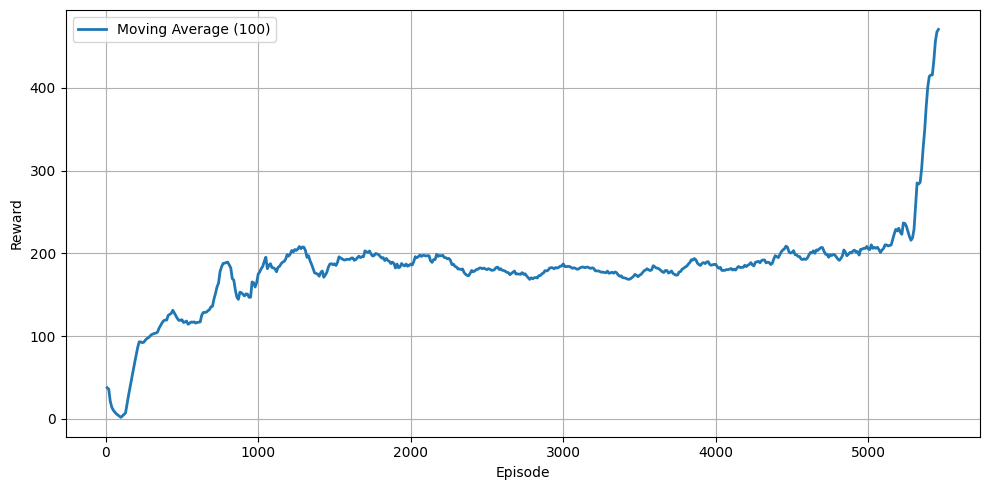

In [11]:
plt.figure(figsize=(10,5))
plt.plot(episodes, moving_avg, label="Moving Average (100)", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("moving_avg2.png")
plt.show()
